# Data Cleaning & Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

First, we'll create a DataFrame containing all the data from the source.

In [4]:
data = pd.read_csv('../data/raw/vgsales.csv')

Let's see a quick review of the DataFrame we have:

In [6]:
print(data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [7]:
print(data.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


At this point, we can see that we don't have the same amount of non null values on all columns. Let's explore and manage this value in the Data Cleaning step.

## Data Cleaning

In [10]:
# Analyze rows with null values
print("Null values:")
print(data.isnull().sum())

Null values:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


After inspecting data, we can see that there's columns with data that must be modified. First, we see that the columns 'Year' and 'Publisher' have some null values (even there isn't much compared with total) so we need to see what to do with them. Apart from that, the column 'Year' is a 'float' type. This doesn't make any sense, so we should replace its type to integer.

In [12]:
# Analyzing rows with null values in 'Year' column
print("Rows with null values in 'Year' column:")
null_year = data[data['Year'].isnull()]
print(null_year.describe())

Rows with null values in 'Year' column:
               Rank  Year    NA_Sales    EU_Sales    JP_Sales  Other_Sales  \
count    271.000000   0.0  271.000000  271.000000  271.000000   271.000000   
mean    8766.741697   NaN    0.219631    0.092288    0.024797     0.032251   
std     4727.830597   NaN    0.425674    0.209604    0.089839     0.075893   
min      180.000000   NaN    0.000000    0.000000    0.000000     0.000000   
25%     4901.500000   NaN    0.010000    0.000000    0.000000     0.000000   
50%     8622.000000   NaN    0.090000    0.020000    0.000000     0.010000   
75%    12818.000000   NaN    0.240000    0.100000    0.000000     0.030000   
max    16496.000000   NaN    4.260000    2.360000    0.770000     0.710000   

       Global_Sales  
count    271.000000  
mean       0.369299  
std        0.615113  
min        0.010000  
25%        0.055000  
50%        0.160000  
75%        0.395000  
max        5.230000  


In [13]:
# Analyzing rows with null values in 'Publisher' column
print("Rows with null values in 'Publisher' column:")
null_publisher = data[data['Publisher'].isnull()]
print(null_publisher.describe())

Rows with null values in 'Publisher' column:
               Rank         Year   NA_Sales   EU_Sales   JP_Sales  \
count     58.000000    36.000000  58.000000  58.000000  58.000000   
mean   10127.879310  2006.805556   0.147241   0.080690   0.016034   
std     4811.947755     4.020088   0.271570   0.164795   0.044640   
min      471.000000  2004.000000   0.000000   0.000000   0.000000   
25%     6585.500000  2004.000000   0.000000   0.000000   0.000000   
50%     9635.000000  2004.000000   0.055000   0.030000   0.000000   
75%    14884.000000  2010.250000   0.157500   0.070000   0.000000   
max    16556.000000  2016.000000   1.570000   1.020000   0.270000   

       Other_Sales  Global_Sales  
count    58.000000     58.000000  
mean      0.011552      0.256552  
std       0.055085      0.465183  
min       0.000000      0.010000  
25%       0.000000      0.022500  
50%       0.000000      0.125000  
75%       0.000000      0.257500  
max       0.410000      3.000000  


We can see in thes previous analysis how not 'Year' nor 'Publisher' has reliable differences on its distribution, compared to global analysis of data. Taking into account that the number of rows with null values is so small, and it makes no sense to give de null values a median or mode value, we can delete this data, and conitnue with analysis without them.

In [15]:
# Delete rows with null values
data = data.dropna()

Let's check there's no null values now:

In [17]:
print(data.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


Now we're going to transform the 'Year' data type from float into integer, more specifically, into a Date type. This will make analysis easier and will have more sense.

In [19]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year

In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB
None


Now that we have the data cleaned, let's do quick analysis, in order todetermine how data is distributed.

## Data Distribution Analysis

First, let's start by measuring the frequency of games that has different amount of sales:

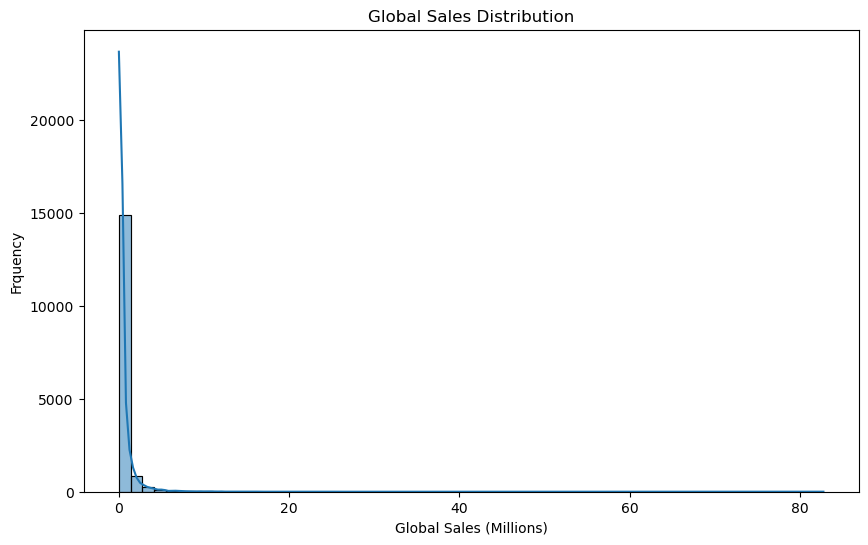

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Global_Sales'], bins=60, kde=True)
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frquency')
plt.show()

We can se that the bastly majority of cases, the sales aren't bigger that 5 milions in sales, but sales can get up to more than 80 million!

Actually, the most interesting insight of this, is seeign the exponential distribution of the sales expected for a game.

Let's now see the distribution of games released and sold every year through histograms:

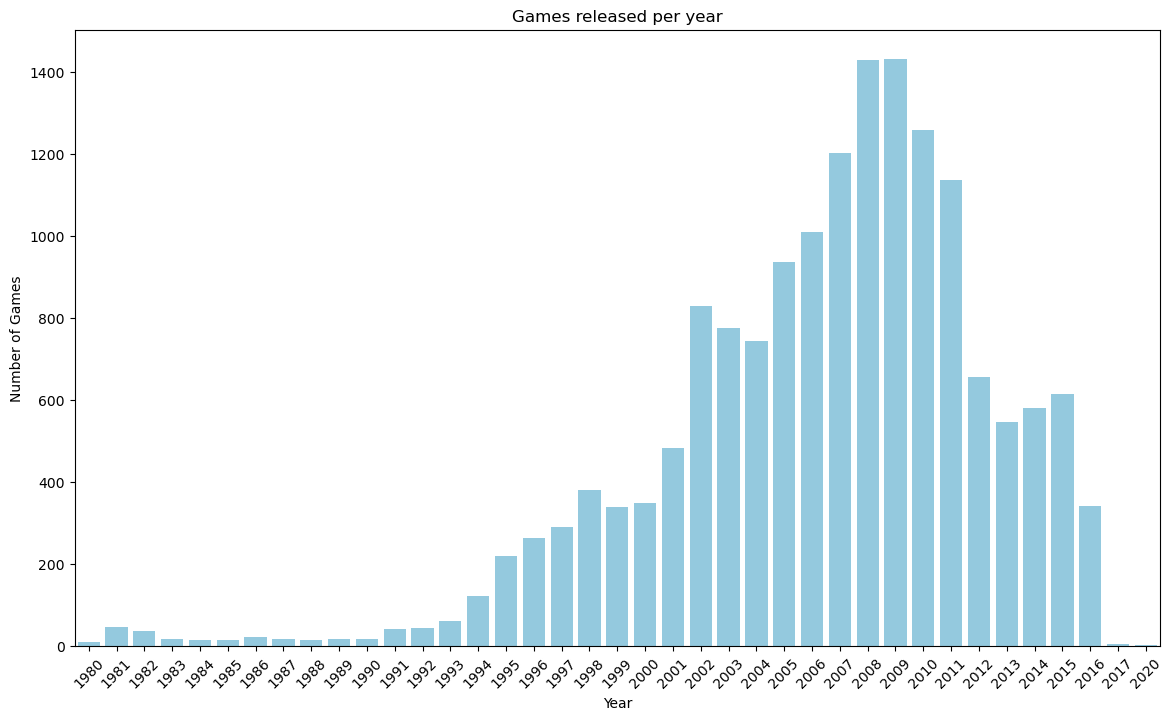

In [24]:
# Games released per year
games_per_year = data['Year'].value_counts().sort_index()

# We create the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='skyblue')
plt.title('Games released per year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

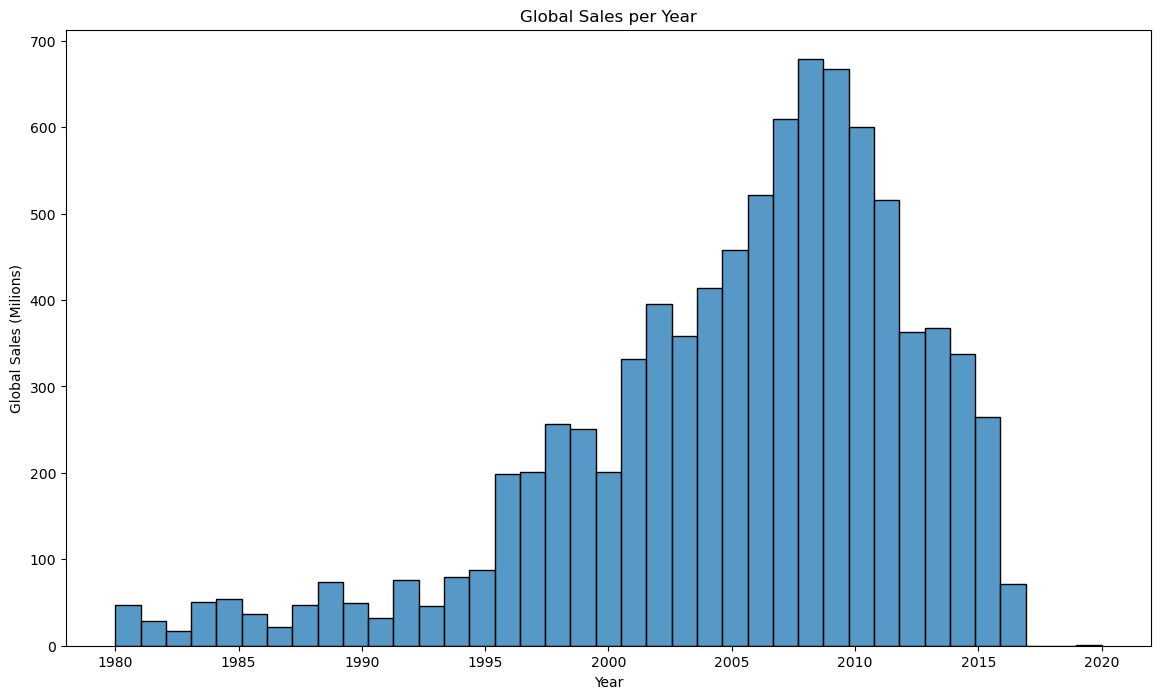

In [25]:
# Games sold per year
# First we group Data per year and sum the total of that year
yearly_sales = data.groupby('Year')['Global_Sales'].sum().reset_index()

# We create the histogram
plt.figure(figsize=(14, 8))
sns.histplot(yearly_sales, x='Year', weights='Global_Sales', bins=yearly_sales['Year'].nunique())
plt.title('Global Sales per Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (Milions)')
plt.show()

We can clearly see a distribution on the sales distribution over every year. Even so, data seems to have a mistake from 2016. First, there's a little amount of values on 2020, that seems to be a mistake. Apart from that, on 2016 there's a big decrease on sales, seems like there's a point in 2016 where the source stopped collecting data. As a result, we cannot use the 2016 as reliable data for our analysis (as we don't have a month field either) se the best thing we can do do is just not use data from 2016, and use all the data to 2015, so we can  trust on data up to this point:

In [27]:
data = data[data['Year'] <= 2015]

Now we repeat the analysis to see the new distribution:

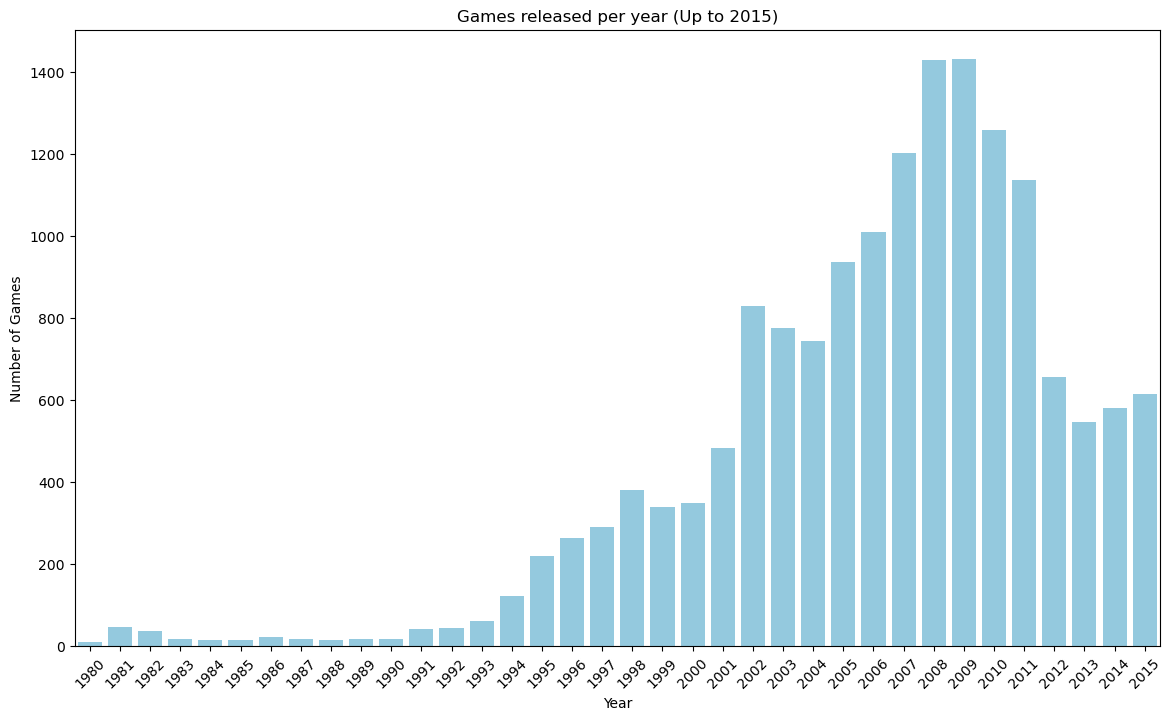

In [29]:
# Games released per year
games_per_year = data['Year'].value_counts().sort_index()

# We create the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='skyblue')
plt.title('Games released per year (Up to 2015)')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

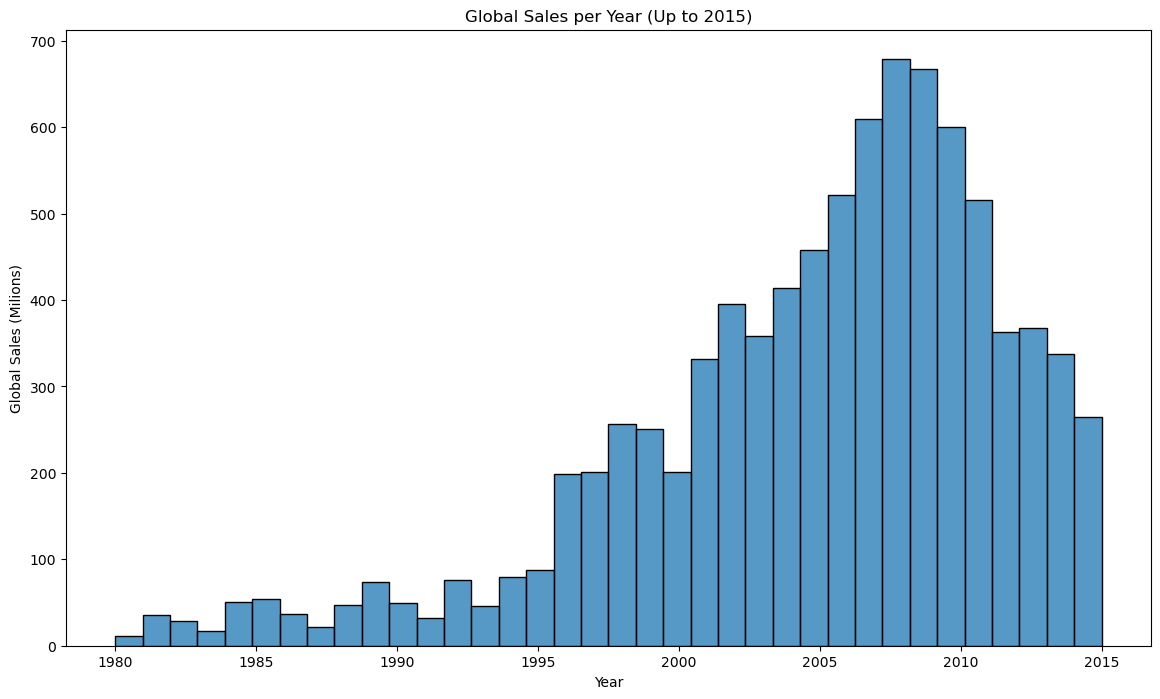

In [30]:
# Games sold per year
# First we group Data per year and sum the total of that year
yearly_sales = data.groupby('Year')['Global_Sales'].sum().reset_index()

# We create the histogram
plt.figure(figsize=(14, 8))
sns.histplot(yearly_sales, x='Year', weights='Global_Sales', bins=yearly_sales['Year'].nunique())
plt.title('Global Sales per Year (Up to 2015)')
plt.xlabel('Year')
plt.ylabel('Global Sales (Milions)')
plt.show()

Now that we have finished all the data cleaning and transformation, we can save the data into a csv file with all the processed data, in order to use them in future steps:

In [32]:
# Guardar el DataFrame procesado en un archivo CSV
data.to_csv('../data/processed/vgsales_processed.csv', index=False)

In the next step, we'll do analysis on the processed data in order to get insights.